In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [4]:
#head of calories data set
calories = pd.read_csv('calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
#head of exercise data set
exercise = pd.read_csv('exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
#tail of calories data set
calories.tail()

,User_ID,Calories
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0
14999,11751526,98.0


In [7]:
#tail of exercise data set
exercise.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5


In [8]:
#merging the two data sets
exercise_merged = exercise.merge(calories, on="User_ID")
exercise_merged.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
#finding total number of instance(rows) and columns of the merged data set
print("Number of instances in the merged dataset: " , exercise_merged.shape[0])
print("Number of columns in the merged dataset: " , exercise_merged.shape[1])

Number of instances in the merged dataset:  15000
Number of columns in the merged dataset:  9


In [10]:
#overall information of the merged dataset
exercise_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
#checking for null values
exercise_merged.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [12]:
#dropping the column User_ID
exercise_merged.drop(columns = "User_ID" , inplace = True)

In [13]:
#statistic summary of data set
exercise_merged.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,15000,2,female,7553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,15000.0,NaN,NaN,NaN,42.7898,16.980264,20.0,28.0,39.0,56.0,79.0
Height,15000.0,NaN,NaN,NaN,174.465133,14.258114,123.0,164.0,175.0,185.0,222.0
Weight,15000.0,NaN,NaN,NaN,74.966867,15.035657,36.0,63.0,74.0,87.0,132.0
Duration,15000.0,NaN,NaN,NaN,15.5306,8.319203,1.0,8.0,16.0,23.0,30.0
Heart_Rate,15000.0,NaN,NaN,NaN,95.518533,9.583328,67.0,88.0,96.0,103.0,128.0
Body_Temp,15000.0,NaN,NaN,NaN,40.025453,0.77923,37.1,39.6,40.2,40.6,41.5
Calories,15000.0,NaN,NaN,NaN,89.539533,62.456978,1.0,35.0,79.0,138.0,314.0


In [14]:
#separating numerical and categorical data
categorical=exercise_merged.select_dtypes(include=['object']).columns
numerical= exercise_merged.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:",categorical)
print("Numerical Variables:",numerical)

Categorical Variables: Index(['Gender'], dtype='object')
Numerical Variables: ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']


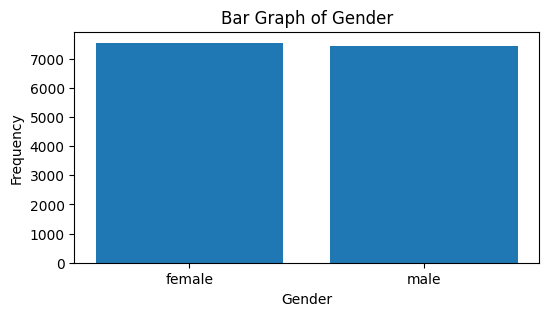

In [15]:
#EDA of categorical data using barplot
#gender
df = pd.read_csv('exercise.csv')
column_name='Gender'
plt.figure(figsize=(6, 3))
plt.bar(df[column_name].value_counts().index, df[column_name].value_counts().values)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Bar Graph of {column_name}')
plt.show()

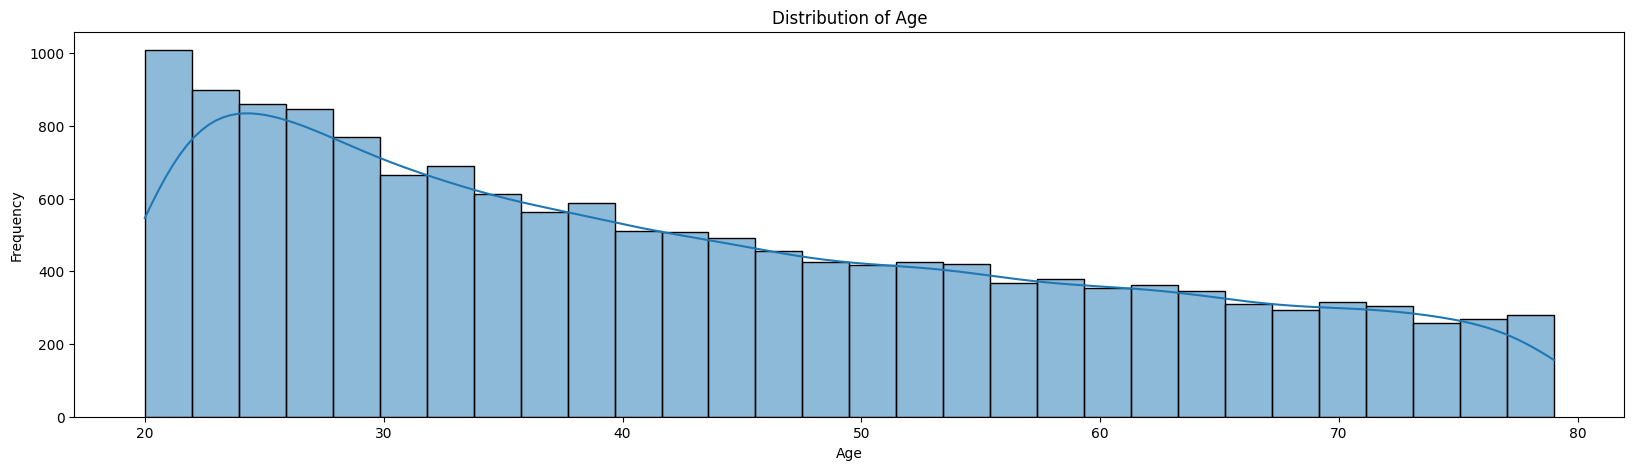

In [16]:
#EDA of numerical data using histogram
#age
df = pd.read_csv('exercise.csv')
column_name='Age'
plt.figure(figsize=(20, 5))
sns.histplot(df[column_name], kde=True, bins=30)
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

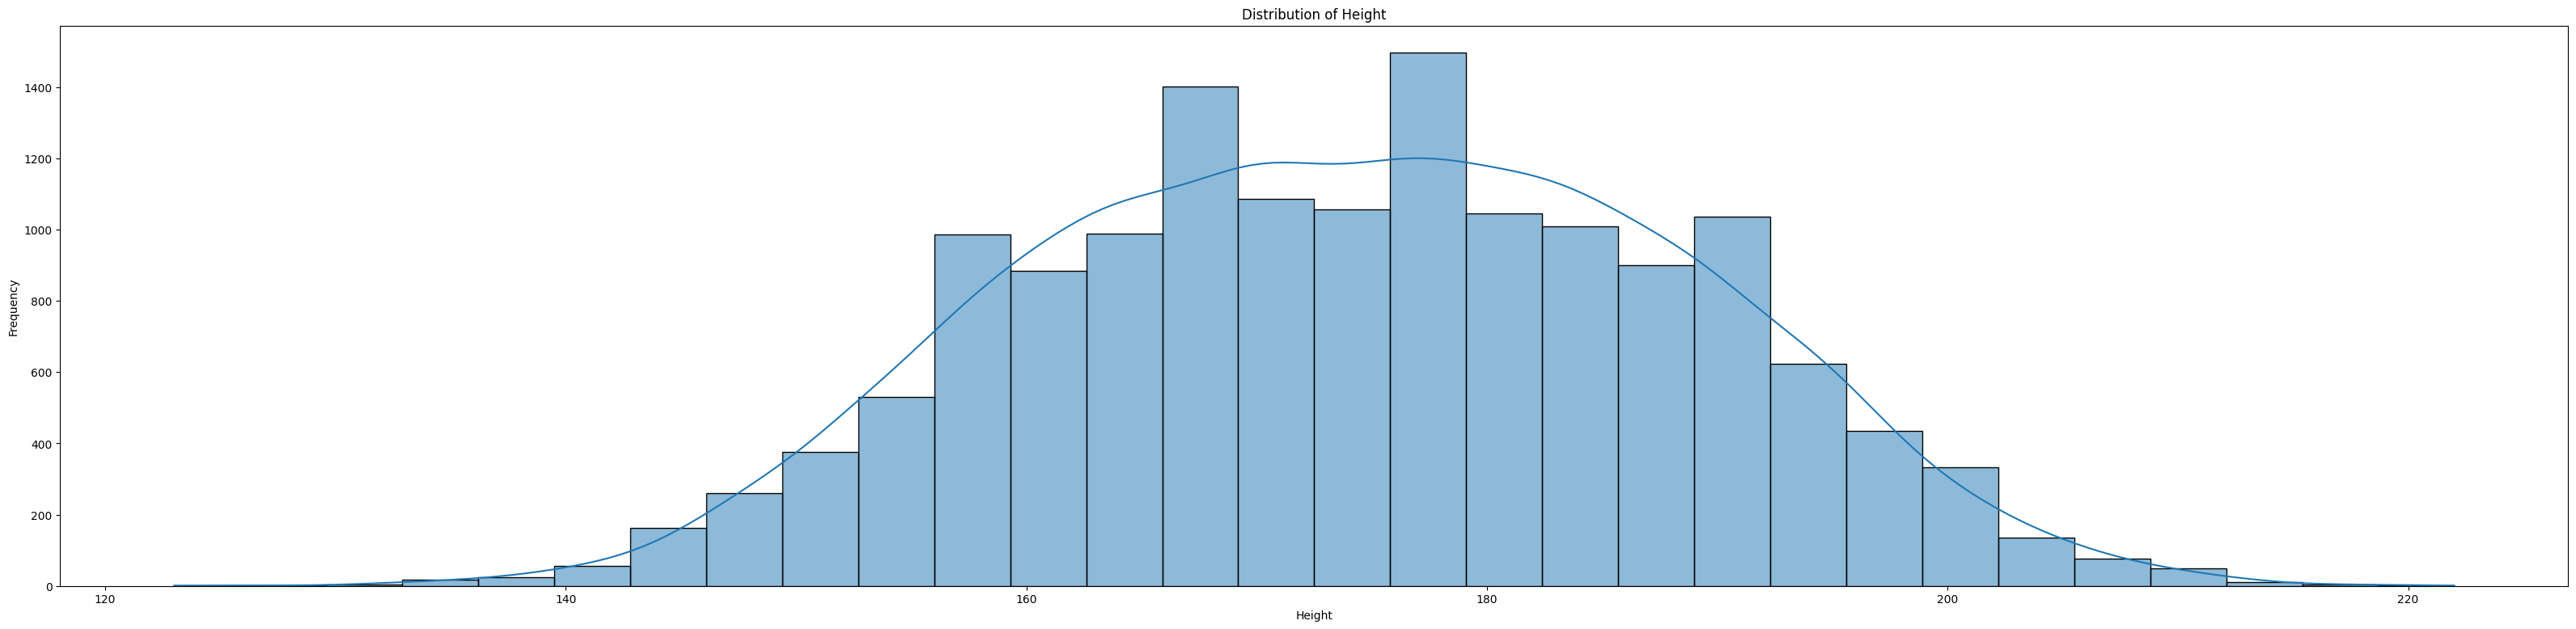

In [17]:
#height
df = pd.read_csv('exercise.csv')
column_name='Height'
plt.figure(figsize=(40, 9))
sns.histplot(df[column_name], kde=True, bins=30)
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

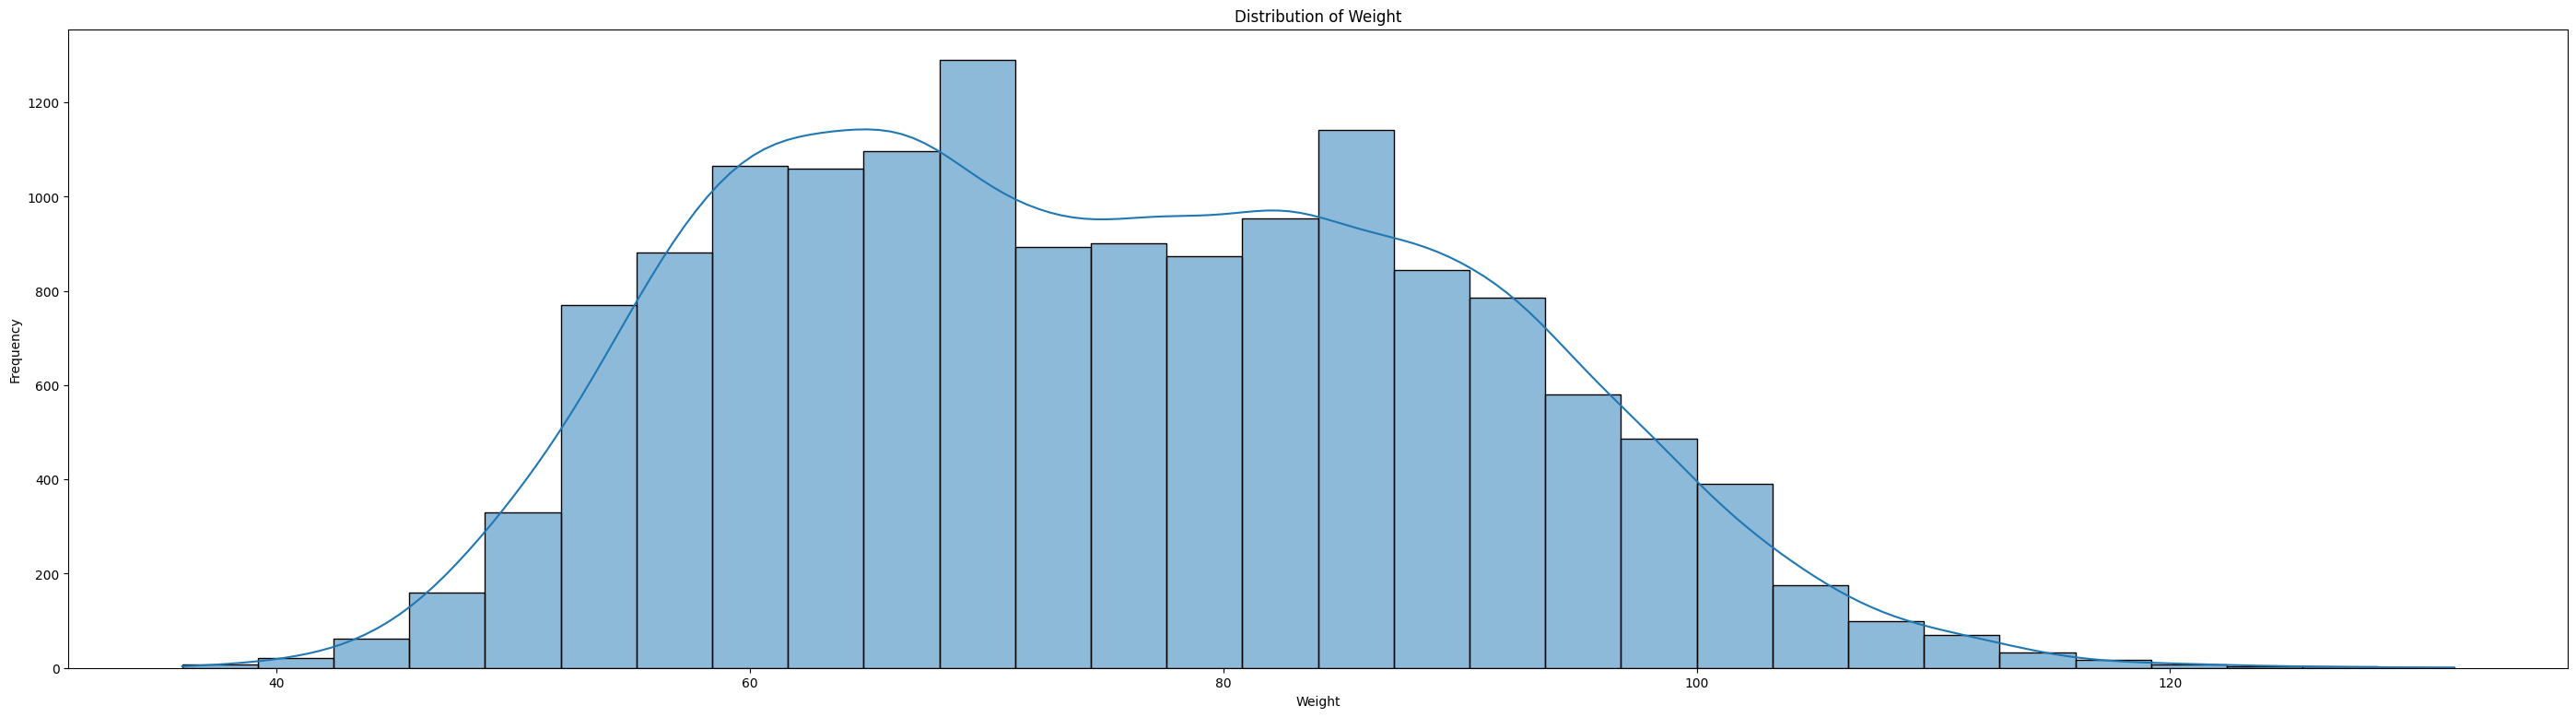

In [18]:
#weight
df = pd.read_csv('exercise.csv')
column_name='Weight'
plt.figure(figsize=(35, 9))
sns.histplot(df[column_name], kde=True, bins=30)
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

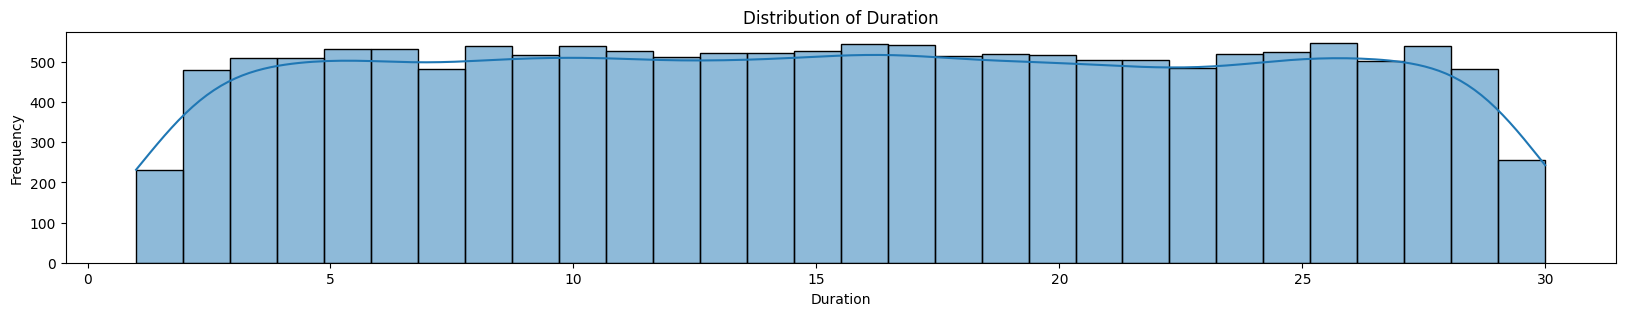

In [19]:
#duration
df = pd.read_csv('exercise.csv')
column_name='Duration'
plt.figure(figsize=(20, 3))
sns.histplot(df[column_name], kde=True, bins=30)
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

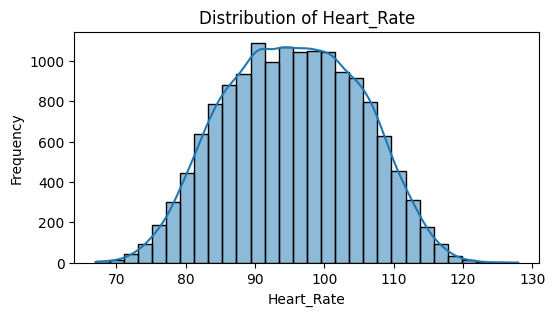

In [20]:
#heart rate
df = pd.read_csv('exercise.csv')
column_name = 'Heart_Rate'
plt.figure(figsize=(6, 3))
sns.histplot(df[column_name], kde=True, bins=30)
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

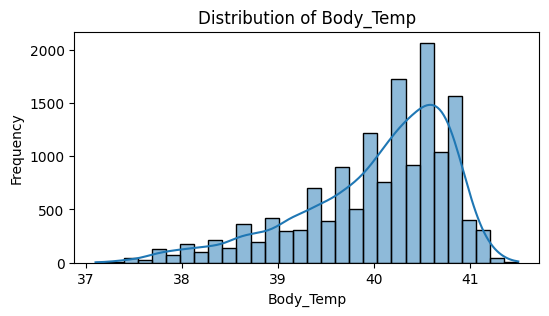

In [21]:
#body temperature
df = pd.read_csv('exercise.csv')
column_name = 'Body_Temp'
plt.figure(figsize=(6, 3))
sns.histplot(df[column_name], kde=True, bins=30)
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

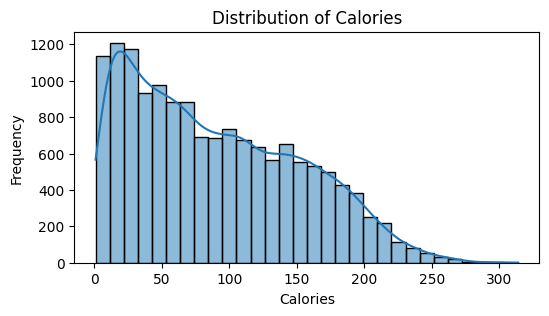

In [22]:
#calories
df = pd.read_csv('calories.csv')
column_name = 'Calories'
plt.figure(figsize=(6, 3))
sns.histplot(df[column_name], kde=True, bins=30)
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

In [23]:
#coverting sting values of gender column to float
exercise_merged.replace({'Gender': {'male' : 0, 'female' : 1}}, inplace=True)

<Axes: >

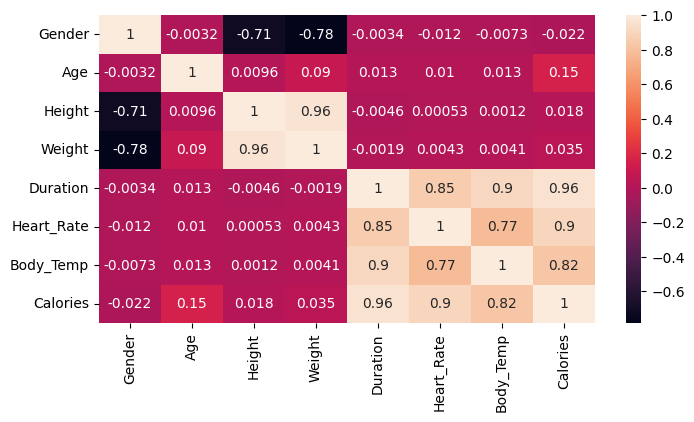

In [24]:
#heat map to understand the correlation
plt.figure(figsize=(8,4))
sns.heatmap(exercise_merged.corr(),annot = True)

In [25]:
X = exercise_merged.drop(columns = ["Calories"],axis = 1)
y = exercise_merged["Calories"]

In [26]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [27]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [28]:
#splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [29]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (12000, 7)
Shape of X Test:  (3000, 7)
Shape of y Train:  (12000,)
Shape of y Test:  (3000,)


In [30]:
#random forest regressor model is preffered for numerical value prediction
random_reg = RandomForestRegressor(n_estimators = 1000 , max_features = 3 , max_depth = 6)
random_reg.fit(X_train , y_train)
random_reg_prediction = random_reg.predict(X_test)

In [31]:
print("Mean Absolute Error(MAE) is: " , round(metrics.mean_absolute_error(y_test , random_reg_prediction) , 2))
print("Mean Squared Error(MSE) is: " , round(metrics.mean_squared_error(y_test , random_reg_prediction) , 2))
print("Root Mean Squared Error(RMSE) is: " , round(np.sqrt(metrics.mean_squared_error(y_test , random_reg_prediction)) , 2))

Mean Absolute Error(MAE) is:  5.41
Mean Squared Error(MSE) is:  70.61
Root Mean Squared Error(RMSE) is:  8.4


In [32]:
exercise_merged.iloc[27]

Gender          0.0
Age            42.0
Height        190.0
Weight         88.0
Duration        3.0
Heart_Rate     83.0
Body_Temp      38.9
Calories       10.0
Name: 27, dtype: float64

In [ ]:
X_array = np.array([[20 , 27 , 30 , 95 , 23 , 2, 40]]).reshape(1 , -1)
y_pred = random_reg.predict(X_array)
print("Prediction: " , round(y_pred[0] , 2))

Prediction:  96.9
